In [3]:
#!kaggle datasets download -d harrywang/housing

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
df = pd.read_csv('housing/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
#Shape of the dataset
df.shape

(20640, 10)

In [8]:
df = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity',
       'median_house_value']]

In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0


In [14]:
# Check for missing values
print("Is Na",df.isna().any())
print("Is None", df.isnull().any())

Is Na longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool
Is None longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool


In [16]:
#total bedrooms is having null values
df['total_bedrooms'].isna().sum()

207

In [21]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='most_frequent')

df['total_bedrooms'] = si.fit_transform(df['total_bedrooms'].values.reshape(-1,1))

In [23]:
#Checking for null values after imputation
print("Is Na",df.isna().any())

Is Na longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
ocean_proximity       False
median_house_value    False
dtype: bool


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,535.284351,420.053240,1.0000,292.0000,431.0000,643.25000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


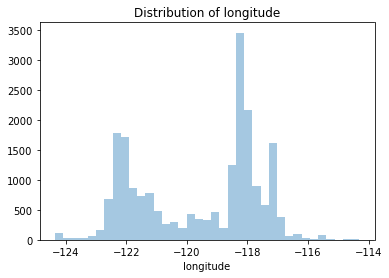

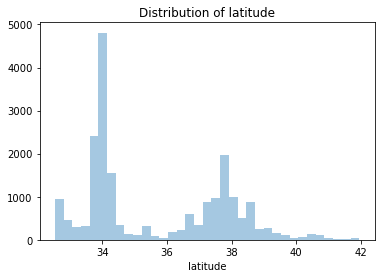

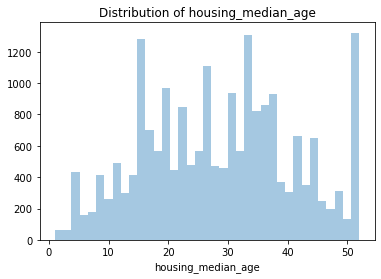

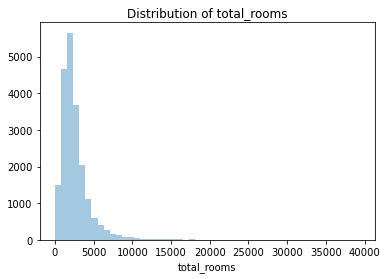

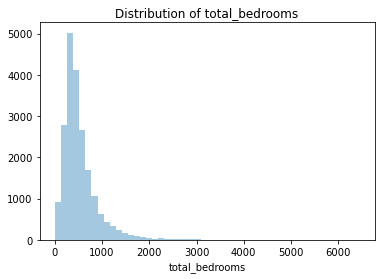

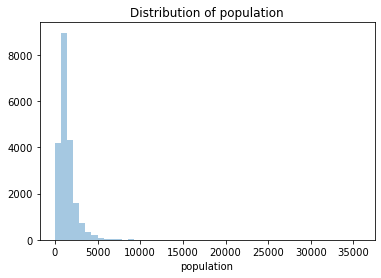

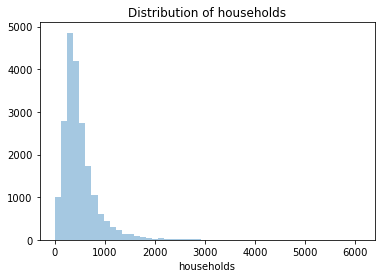

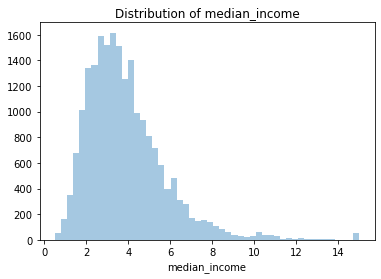

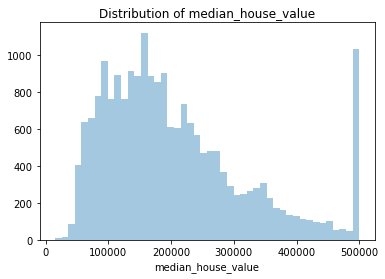

In [29]:
for column in df.select_dtypes(exclude='object').columns:
    sns.distplot(df[column], kde=False)
    plt.xlabel(column)
    plt.title(f"Distribution of {column}")
    plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

In [31]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,342200.0


In [36]:
# Normalizing the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
print(df.dtypes)
# All the datatypes should be numeric

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity         int32
median_house_value    float64
dtype: object


In [39]:
min_max_scaler = MinMaxScaler()
columns = df.columns[:-1]
print(columns)
df[columns] = min_max_scaler.fit_transform(df[columns])

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')


In [40]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.75,452600.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.75,358500.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.75,352100.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.75,341300.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.75,342200.0


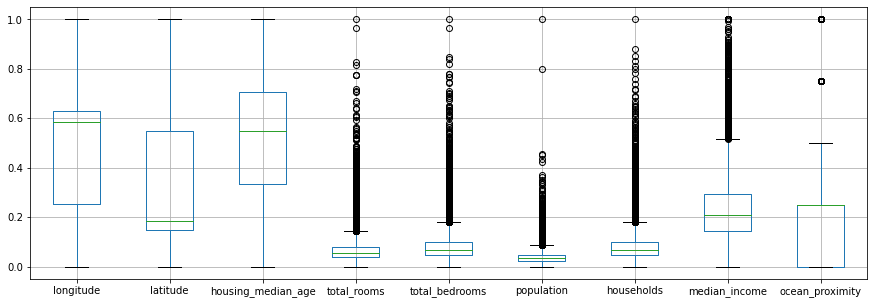

In [45]:
# Checking the boxplot
plt.figure(figsize=(15,5))
df[columns].boxplot()
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 9)
(4128, 9)
(16512,)
(4128,)


In [52]:
import tensorflow_docs as tfdocs
from tensorflow_docs import plots, modeling

In [88]:
input_shape = [X_train.shape[1]]
model = keras.Sequential([
    layers.Dense(units=64, activation='relu', input_shape=input_shape),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=1)
])

model.compile(optimizer='RMSprop', loss='mse', metrics=['mse', 'mae'])

In [89]:
history = model.fit(X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=100, 
                    callbacks=[modeling.EpochDots(20)],use_multiprocessing=True)

Epoch 1/100
516/516 [==============================] - 1s 2ms/step - loss: 56180064256.0000 - mse: 56180064256.0000 - mae: 206916.1250 - val_loss: 50264993792.0000 - val_mse: 50264993792.0000 - val_mae: 202909.6406

Epoch: 0, loss:56180064256.0000,  mae:206916.1250,  mse:56180064256.0000,  val_loss:50264993792.0000,  val_mae:202909.6406,  val_mse:50264993792.0000,  
.Epoch 2/100
516/516 [==============================] - 1s 1ms/step - loss: 54920994816.0000 - mse: 54920994816.0000 - mae: 203910.7500 - val_loss: 47935115264.0000 - val_mse: 47935115264.0000 - val_mae: 197223.2656
.Epoch 3/100
516/516 [==============================] - 1s 1ms/step - loss: 51008921600.0000 - mse: 51008921600.0000 - mae: 194230.1719 - val_loss: 42338795520.0000 - val_mse: 42338795520.0000 - val_mae: 182850.9531
.Epoch 4/100
516/516 [==============================] - 1s 1ms/step - loss: 43397152768.0000 - mse: 43397152768.0000 - mae: 173888.4844 - val_loss: 32970557440.0000 - val_mse: 32970557440.0000 - val_

516/516 [==============================] - 1s 1ms/step - loss: 5865592832.0000 - mse: 5865592832.0000 - mae: 56691.7930 - val_loss: 1179342336.0000 - val_mse: 1179342336.0000 - val_mae: 25187.3574
.Epoch 39/100
516/516 [==============================] - 1s 1ms/step - loss: 5846624768.0000 - mse: 5846624768.0000 - mae: 56527.2617 - val_loss: 1157617792.0000 - val_mse: 1157617792.0000 - val_mae: 24902.0215
.Epoch 40/100
516/516 [==============================] - 1s 2ms/step - loss: 5829720576.0000 - mse: 5829720576.0000 - mae: 56367.0547 - val_loss: 1138494208.0000 - val_mse: 1138494208.0000 - val_mae: 24631.7129
.Epoch 41/100
516/516 [==============================] - 1s 1ms/step - loss: 5813703680.0000 - mse: 5813703680.0000 - mae: 56262.1992 - val_loss: 1121386624.0000 - val_mse: 1121386624.0000 - val_mae: 24449.1406

Epoch: 40, loss:5813703680.0000,  mae:56262.1992,  mse:5813703680.0000,  val_loss:1121386624.0000,  val_mae:24449.1406,  val_mse:1121386624.0000,  
.Epoch 42/100
516/516

.Epoch 76/100
516/516 [==============================] - 1s 1ms/step - loss: 5395912192.0000 - mse: 5395912192.0000 - mae: 53581.7500 - val_loss: 711475072.0000 - val_mse: 711475072.0000 - val_mae: 19262.9258
.Epoch 77/100
516/516 [==============================] - 1s 1ms/step - loss: 5384648704.0000 - mse: 5384648704.0000 - mae: 53577.8750 - val_loss: 700405696.0000 - val_mse: 700405696.0000 - val_mae: 19125.2949
.Epoch 78/100
516/516 [==============================] - 1s 1ms/step - loss: 5374331904.0000 - mse: 5374331904.0000 - mae: 53420.5156 - val_loss: 692177024.0000 - val_mse: 692177024.0000 - val_mae: 18985.4453
.Epoch 79/100
516/516 [==============================] - 1s 1ms/step - loss: 5363299840.0000 - mse: 5363299840.0000 - mae: 53399.8281 - val_loss: 680960320.0000 - val_mse: 680960320.0000 - val_mae: 18830.3809
.Epoch 80/100
516/516 [==============================] - 1s 1ms/step - loss: 5352432640.0000 - mse: 5352432640.0000 - mae: 53360.7188 - val_loss: 670611840.0000 - v

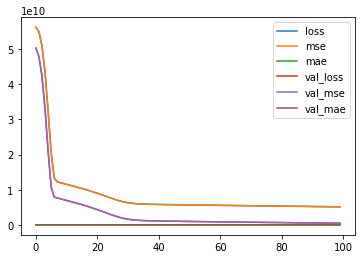

In [90]:
history_df = pd.DataFrame(history.history)
history_df.plot()
plt.show()

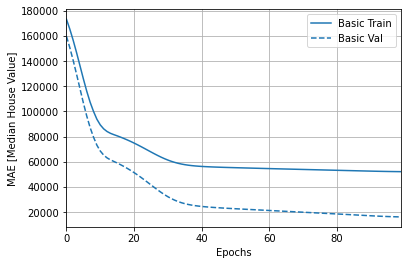

In [91]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic':history}, metric='mae')
plt.ylabel('MAE [Median House Value]')
plt.show()

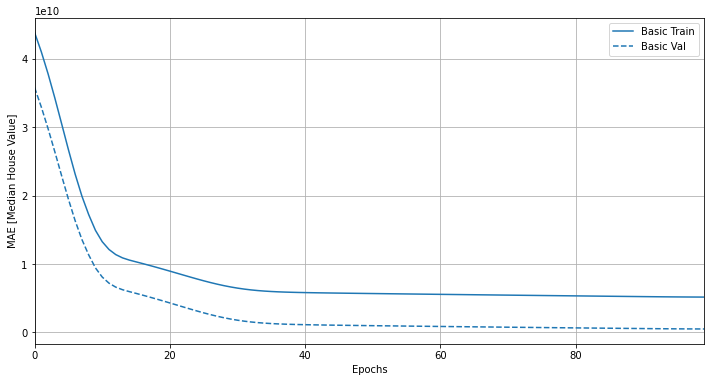

In [92]:
plt.figure(figsize=(12, 6))
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic':history}, metric='mse')
plt.ylabel('MAE [Median House Value]')
plt.show()

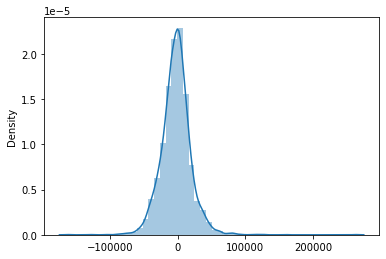

In [93]:
predictions = model.predict(X_test)
error = y_test - predictions
sns.distplot(error)
plt.show()

In [94]:
y_test

array([[ 71027.48],
       [130367.23],
       [262901.75],
       ...,
       [456959.94],
       [112275.08],
       [171650.1 ]], dtype=float32)

In [95]:
predictions

array([[ 72718.516],
       [147571.5  ],
       [262207.5  ],
       ...,
       [450034.7  ],
       [147360.05 ],
       [166708.4  ]], dtype=float32)